In [1]:
import numpy as np
from matplotlib import pyplot as plt

from numpy.random import default_rng
rng = default_rng()

In [2]:
def generate_arrival_data(num_busses, num_persons):
    """Generate arrival times for busses (Poisson process, i.e.
    waiting times follow exponential distribution) and people
    (uniform distribution).
    """

    # Arrival time of busses (Poisson process)
    dt_busses = rng.exponential(scale=6, size=num_busses)
    t_busses = np.cumsum(dt_busses)
    
    # Arrival time of persons (uniform)
    T = t_busses[-1]
    t_persons = rng.uniform(low=0, high=T, size=num_persons)
    
    return t_busses, t_persons

### Visualization (arrival times)

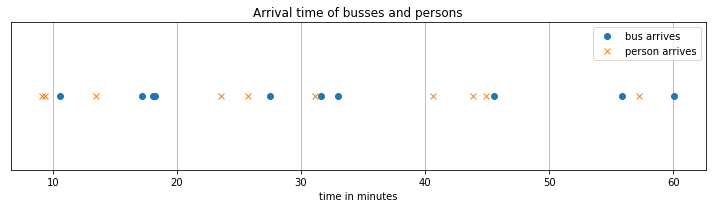

In [10]:
# Generate arrival times for busses and people
num_busses  = 10
num_persons = 10
t_busses, t_persons = generate_arrival_data(num_busses, num_persons)

# Visualization
fig, ax = plt.subplots(1, 1, figsize=(10, 3))

ax.plot(t_busses, np.zeros_like(t_busses), 'o', label="bus arrives")
ax.plot(t_persons, np.zeros_like(t_persons), 'x', label="person arrives")

ax.grid()
ax.legend()
ax.set_xlabel("time in minutes")
ax.get_yaxis().set_visible(False)
ax.set_title("Arrival time of busses and persons")

plt.tight_layout()
plt.show()

### Statistics (waiting times)

In [4]:
# Generate arrival times for busses and people
num_busses  = 1000
num_persons = 10000
t_busses, t_persons = generate_arrival_data(num_busses, num_persons)

# Statistics: Average waiting time
dt_persons = np.zeros_like(t_persons)
for idx in range(num_persons):
    
    # Which bus is the next one (argmax returns first occurance)
    bus_index = np.argmax(t_busses >= t_persons[idx])
    
    # When does this bus arrive and how long did person have to wait for it
    t_bus = t_busses[bus_index]
    dt_persons[idx] = t_bus - t_persons[idx]

print("Average waiting time = ", dt_persons.mean())

Average waiting time =  5.780919470422681


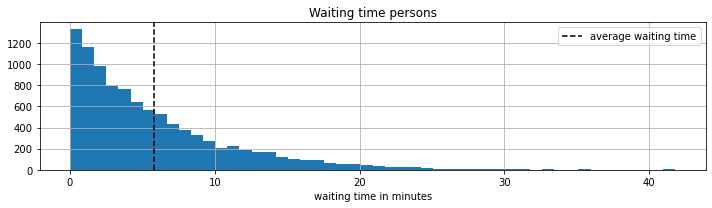

In [15]:
# Visualization
fig, ax = plt.subplots(1, 1, figsize=(10, 3))

ax.hist(dt_persons, bins=50)
ax.axvline(dt_persons.mean(), color='k', ls='--', label="average waiting time")

ax.grid()
ax.set_xlabel("waiting time in minutes")
ax.set_title("Waiting time persons")
ax.legend()

plt.tight_layout()
plt.show()